First, we will install the important modules needed for the assignment.

In [1]:
!pip install scikeras

In [2]:
!pip install --upgrade scikit-learn

In [3]:
!pip install dill

Then, we can import all the important modules and functions needed for the assignment.

In [4]:
# For data preprocessing
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# For feature engineering
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# For exploratory data analysis
import matplotlib.pyplot as plt
import seaborn as sns

# For model training
from sklearn.model_selection import train_test_split

# For model optimization
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.optimizers import Adam, SGD
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization

# For model testing
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report

# For saving the model
from keras.models import load_model, save_model
import dill as pickle
from google.colab import files
import joblib

Next, we will import the needed datasets for the assignment.

In [5]:
# Import dataset
churn_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Intro to AI/datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv")

Now, we can start data preprocessing.

# <center>__Data Preprocessing__</center>

Firstly, we will examine the dataset to have a general idea of how the features look like. This will help us know which columns to remove, impute, and encode.

In [6]:
# Examining the dataset
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Per observation, we will remove the customerID column because it serves as a unique identifier for each customer and doesn't provide any meaningful information or predictive value for the machine learning task at hand.

In [7]:
# Removing customerID column
churn_df.drop('customerID', axis=1, inplace=True)

In [8]:
# Examining the dataset
churn_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Per observation, we see that none of the columns contain null values, and most of them are object data types. We can also observe that although the TotalCharges contains float values, it is stored as an object data type.


We will convert the TotalCharges from object to float.

In [9]:
# Converting TotalCharges column
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'], errors='coerce')

In [10]:
# Examining the new dataset
churn_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Now, we need to separate the dataset into numeric and non-numeric columns for imputation and encoding.

In [11]:
# Separating the numeric columns from the dataframe
numeric_columns = churn_df.select_dtypes(include=['number'])

In [12]:
# Imputing the missing values with the mean value
imp=SimpleImputer()
imp.fit(numeric_columns)
imputed_data=imp.fit_transform(numeric_columns)
numeric_columns=pd.DataFrame(imputed_data, columns=numeric_columns.columns)

In [13]:
# Examining the numeric columns
numeric_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   float64
 1   tenure          7043 non-null   float64
 2   MonthlyCharges  7043 non-null   float64
 3   TotalCharges    7043 non-null   float64
dtypes: float64(4)
memory usage: 220.2 KB


Now that we have imputed missing values and the numeric dataframe is complete, we can move on to the non-numeric columns.

In [14]:
# Separating the string categorical values from the dataframe
categorical_columns = churn_df.select_dtypes(exclude=['number'])

# Create a dictionary to store LabelEncoders
label_encoders = {}

# Encoding the object values to numeric data types
for col in categorical_columns.columns:
    le = LabelEncoder()
    categorical_columns[col] = le.fit_transform(categorical_columns[col])

    # Save the LabelEncoder in the dictionary
    label_encoders[col] = le

# Save the dictionary of LabelEncoders
with open('label_encoders.pkl', 'wb') as file:
    pickle.dump(label_encoders, file)

After imputing and encoding the numerical and non-numerical data types, we will combine them and check their importance with the target variable using a classifier model. This is where the feature engineering process starts.

In [15]:
# Combining the two dataframes
combined_df = pd.concat([numeric_columns, categorical_columns], axis=1)
combined_df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0.0,1.0,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0.0,34.0,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0.0,2.0,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0.0,45.0,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0.0,2.0,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


Now that the data has been cleaned and processed, we can move onto the feature engineering process where we will select important features that will help us predict the churn rate.

# <center>__Feature Engineering, Extraction and Select Features__</center>

For the feature engineering, extraction, and selection process. We will use Recursive Feature Elimination. RFE is a recursive process that starts with all the features in the dataset and then iteratively removes the least essential features until the desired number of features is reached.

Before we start, we need to separate our feature and target variables, and create our classifier object.

In [16]:
# Target variable
y = combined_df['Churn']

# Feature variables
X = combined_df.drop('Churn', axis=1)

# Classifier object
rfc = RandomForestClassifier()

Then, we will scale these features to ensure that they have consistent scales and to prevent features with larger magnitudes from dominating the modeling process.

In [17]:
# Create a dictionary to store StandardScaler instances
scalers = {}

for feature in X.columns:
    # Scaling the feature variables
    sc = StandardScaler()
    scaled_data = sc.fit_transform(X[[feature]])

    # Save the StandardScaler instance to the dictionary
    scalers[feature] = sc

    # Transform the feature in the original DataFrame
    X[feature] = scaled_data

# Save the dictionary of StandardScalers
with open('scalers.pkl', 'wb') as file:
    pickle.dump(scalers, file)

# Now, X contains the scaled features
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,-0.439916,-1.277445,-1.160323,-0.994971,-1.009559,1.034530,-0.654012,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558
1,-0.439916,0.066327,-0.259629,-0.173876,0.990532,-0.966622,-0.654012,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863
2,-0.439916,-1.236724,-0.362660,-0.960399,0.990532,-0.966622,-0.654012,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863
3,-0.439916,0.514251,-0.746535,-0.195400,0.990532,-0.966622,-0.654012,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052
4,-0.439916,-1.236724,0.197365,-0.941193,-1.009559,-0.966622,-0.654012,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558


Next, we'll use RFE find the optimal number of features.

In [18]:
# Use RFE to find the optimal number of features
selector = RFE(rfc)
selector = selector.fit(X, y)

In [19]:
# Print the optimal number of features
print("Optimal number of features: %d" % selector.n_features_)

# Get the selected features
selected_features = X.columns[selector.support_]

# Print the selected features
print("Selected features: %s" % selected_features)

Optimal number of features: 9
Selected features: Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender', 'InternetService',
       'OnlineSecurity', 'TechSupport', 'Contract', 'PaymentMethod'],
      dtype='object')


In [20]:
# Select only the relevant features
X_rfe = combined_df[selected_features]
X_rfe.head()

,tenure,MonthlyCharges,TotalCharges,gender,InternetService,OnlineSecurity,TechSupport,Contract,PaymentMethod
0,1.0,29.85,29.85,0,0,0,0,0,2
1,34.0,56.95,1889.50,1,0,2,0,1,3
2,2.0,53.85,108.15,1,0,2,0,0,3
3,45.0,42.30,1840.75,1,0,2,2,1,0
4,2.0,70.70,151.65,0,1,0,0,0,2


Now we will compare the relevant features with the target variable using Explorative Data Analysis.

# <center>__Exploratory Data Analysis__</center>

In [21]:
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


We will use bar charts to compare churn rates with categorical variables and histograms to compare churn rates with numerical variables

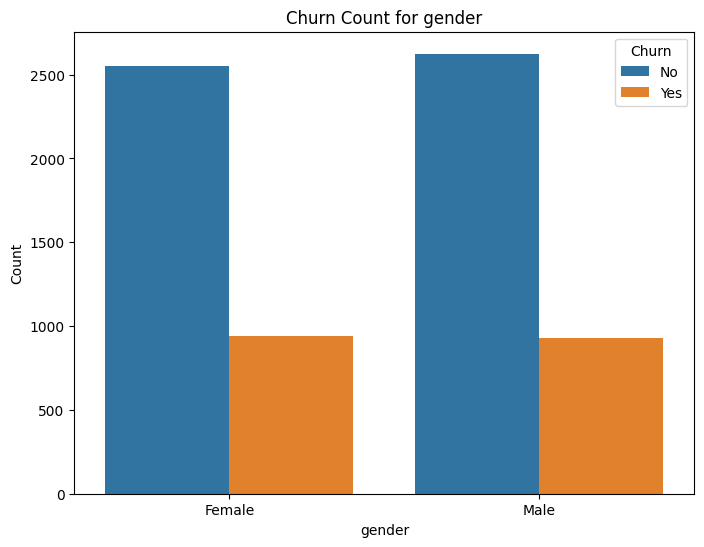

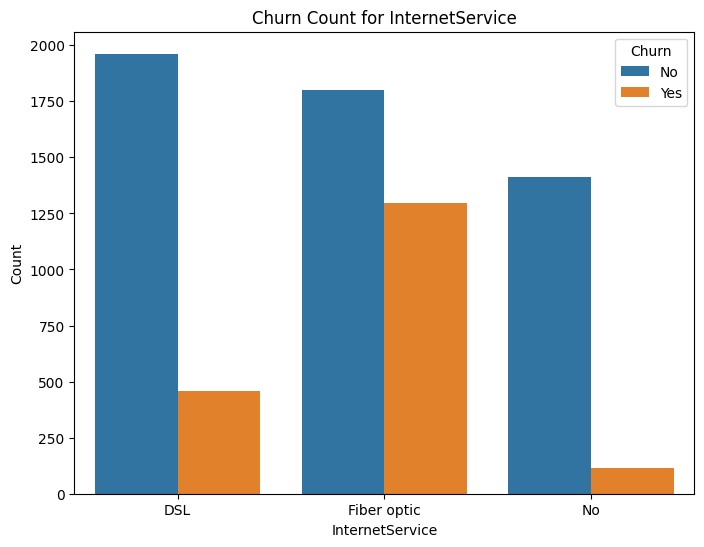

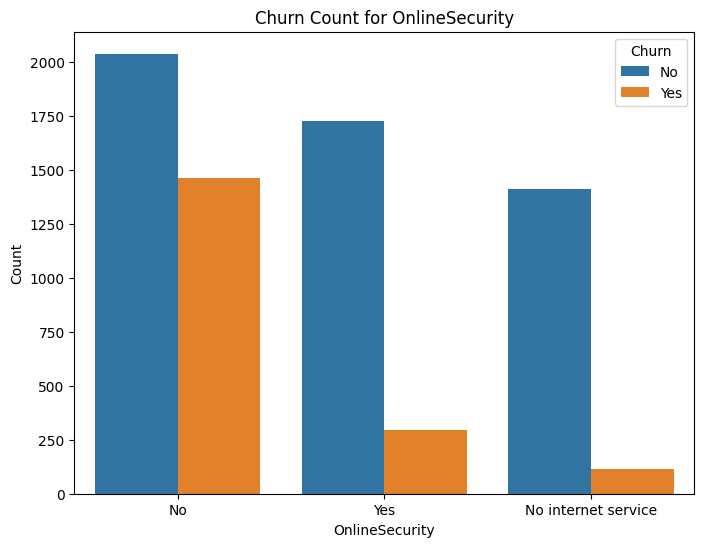

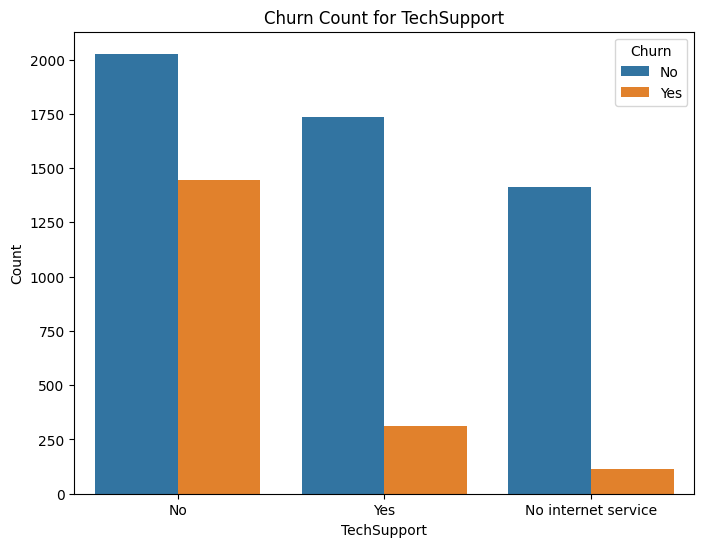

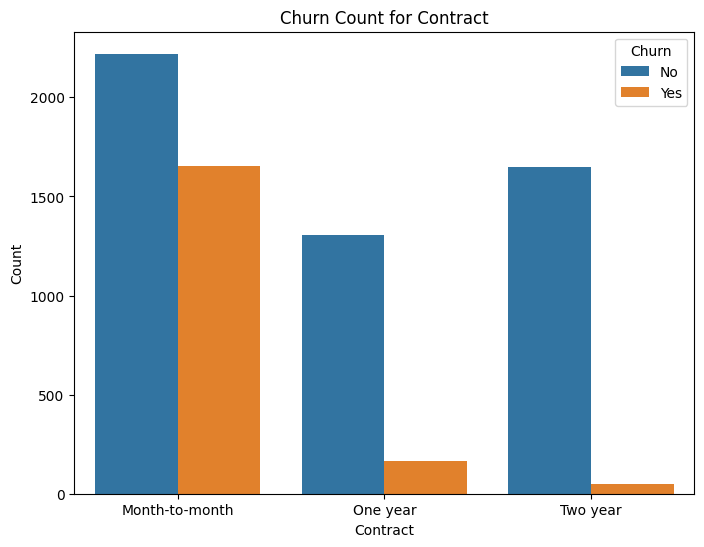

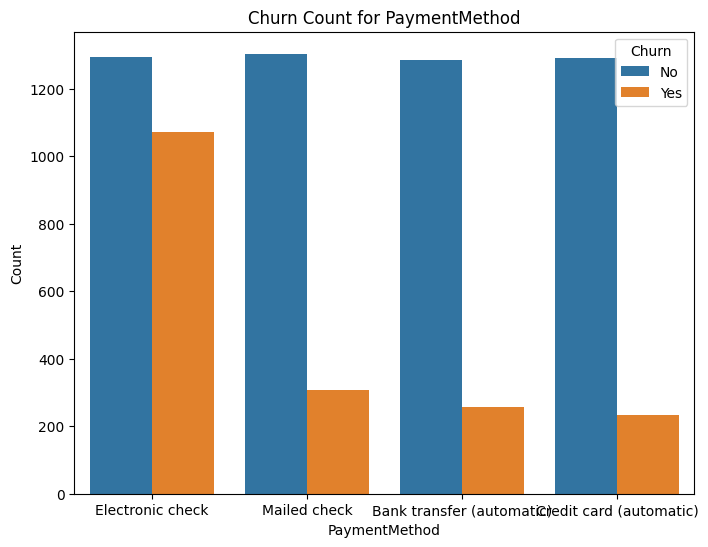

In [22]:
# Determine categorical columns
categorical_columns = churn_df[selected_features].select_dtypes(exclude=['number'])

# Create bar charts for each categorical column
for category in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=churn_df, x=category, hue='Churn')
    plt.title(f'Churn Count for {category}')
    plt.xlabel(category)
    plt.ylabel('Count')
    plt.legend(title='Churn', labels=['No', 'Yes'])
    plt.show()

Per observation, the following conclusions can be made:

*   Gender: There is an equally high distribution (around 2,500 people) of males and females that do not churn and an equally low distribution (around 1,000 people) that don't churn for both genders.

*   Partner: People without a partner are more likely to churn (around 1,200 people) and people with a partner are less likely to churn (more than 2,500 people).

*   MultipleLines: Majority of people with no MultipleLines do not churn (aroung 2,500 people). However, more people that churn either have MultipleLines or not.

*   InternetService: People who use DSL are the least likely to churn (around 2,000 people). People who use Fibre optic are the most likely to churn (around 1,250 people).





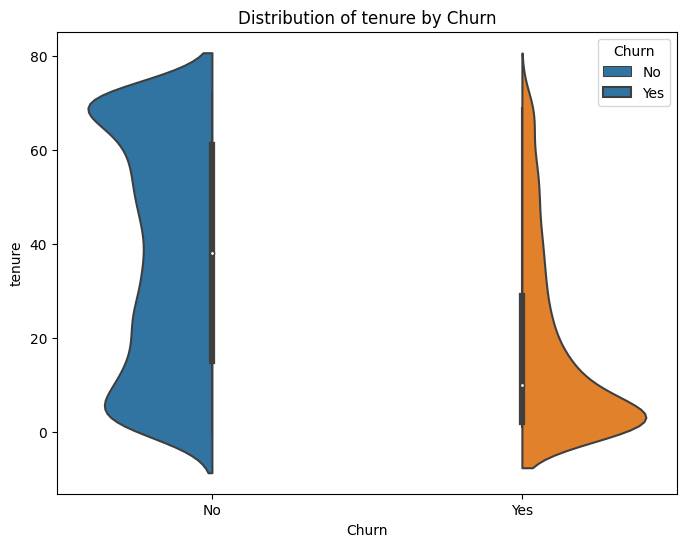

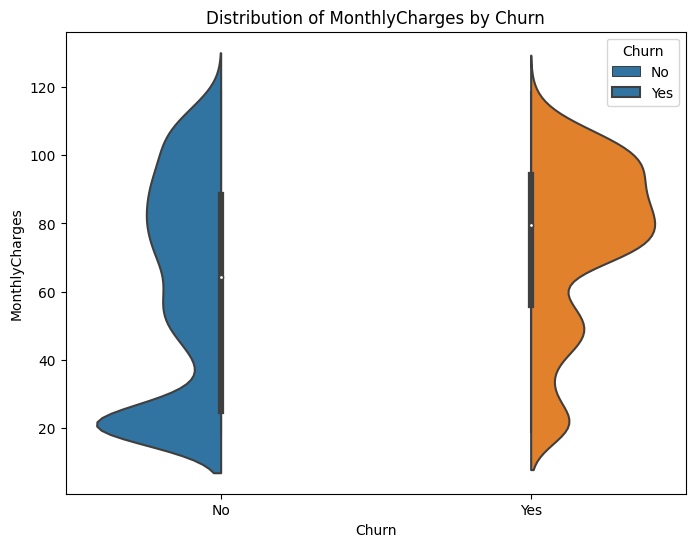

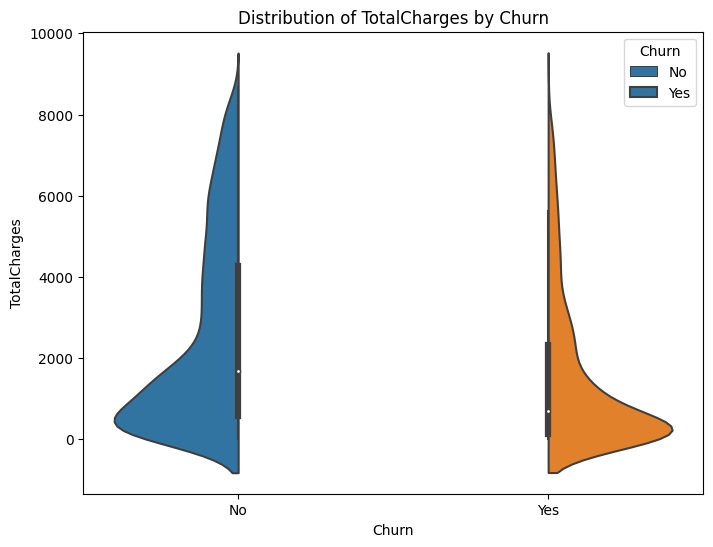

In [23]:
# Get a list of all numeric columns (excluding 'Churn')
numeric_columns_eda = churn_df[selected_features].select_dtypes(include=['number'])

# Create violin plots for each numeric column
for column in numeric_columns_eda:
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=churn_df, x='Churn', y=column, hue='Churn', split=True)
    plt.title(f'Distribution of {column} by Churn')
    plt.xlabel('Churn')
    plt.ylabel(column)
    plt.legend(title='Churn', labels=['No', 'Yes'])
    plt.show()

The Exploratory Data Analysis reveals that the following customer profiles are more likely to experience high rates of churning:

- Customers who do not have a partner.
- Customers who have Fiber Optic internet service.
- Customers who do not have online security.
- Customers who do not have online backup.
- Customers who do not have device backup.
- Customers who do not have tech support.
- Customers with a Month-to-Month contract.
- Customers with paperless billing.
- Customers who use Electronic Check as a payment method.
- Customers with a short tenure.
- Customers who pay a monthly charge of $80.

Now that we have defined the customer profile, we can move on to model training, testing, and optimization.

# <center>__Model Training, Testing, and Optimization__</center>

Using cross validation and GridSearchCV, we will train and evaluate a multi-layer perceptron model with different hyperparameters, such as the number of hidden layers, the number of neurons, the activation function, the learning rate, and the regularization parameter, and measure its accuracy and calculate the AUC score.

In [24]:
# Select only the relevant features
X_rf = X[selected_features]

# Saving the scaled features
#X_rf.to_csv('training_data.csv')
#files.download('training_data.csv')

# Split the dataset into training (80%) and temp (20%)
X_train, X_temp, Y_train, Y_temp = train_test_split(X_rf, y, test_size=0.2, random_state=42)

# Split the temp set into testing (50%) and validation (50%)
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

In [25]:
# Keras Functional API model
input_layer = Input(shape=(X_train.shape[1],))
hidden_layer_1 = Dense(32, activation='relu')(input_layer)
hidden_layer_2 = Dense(24, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(12, activation='relu')(hidden_layer_2)
output_layer = Dense(1, activation='sigmoid')(hidden_layer_3)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
result = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_val, Y_val))

Epoch 1/100
177/177 [==============================] - 5s 17ms/step - loss: 0.6928 - accuracy: 0.5277 - val_loss: 0.6202 - val_accuracy: 0.7560
Epoch 2/100
177/177 [==============================] - 1s 8ms/step - loss: 0.5839 - accuracy: 0.7565 - val_loss: 0.5412 - val_accuracy: 0.7702
Epoch 3/100
177/177 [==============================] - 1s 7ms/step - loss: 0.5314 - accuracy: 0.7728 - val_loss: 0.4972 - val_accuracy: 0.7745
Epoch 4/100
177/177 [==============================] - 2s 11ms/step - loss: 0.5024 - accuracy: 0.7762 - val_loss: 0.4687 - val_accuracy: 0.7801
Epoch 5/100
177/177 [==============================] - 2s 11ms/step - loss: 0.4839 - accuracy: 0.7788 - val_loss: 0.4510 - val_accuracy: 0.7915
Epoch 6/100
177/177 [==============================] - 3s 15ms/step - loss: 0.4720 - accuracy: 0.7796 - val_loss: 0.4394 - val_accuracy: 0.8000
Epoch 7/100
177/177 [==============================] - 2s 11ms/step - loss: 0.4635 - accuracy: 0.7817 - val_loss: 0.4315 - val_accuracy: 0

In [27]:
# Evaluating the model's train loss and accuracy
loss, accuracy = model.evaluate(X_train, Y_train)
print(f'Train Loss: {loss:.2f}')
print(f'Train Accuracy: {accuracy*100:.2f}')

177/177 [==============================] - 0s 2ms/step - loss: 0.4121 - accuracy: 0.8035
Train Loss: 0.41
Train Accuracy: 80.35


In [28]:
# Evaluating the model's test loss and accuracy
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Test Loss: {loss:.2f}')
print(f'Test Accuracy: {accuracy*100:.2f}')

22/22 [==============================] - 0s 2ms/step - loss: 0.4177 - accuracy: 0.8054
Test Loss: 0.42
Test Accuracy: 80.54


In [29]:
# Predict probabilities on the test set
y_pred_prob = model.predict(X_test)

# Flatten the predictions if needed
y_pred_prob = np.ravel(y_pred_prob)

# Calculate AUC score
auc_score = roc_auc_score(Y_test, y_pred_prob)

# Round probabilities to obtain binary predictions
y_pred_binary = np.round(y_pred_prob)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred_binary)

# Print or use the accuracy and AUC score as needed
print(f"Accuracy: {accuracy*100:.2f}")
print(f"AUC Score: {auc_score:.2f}")

22/22 [==============================] - 0s 2ms/step
Accuracy: 80.54
AUC Score: 0.85


Per observation, the model gave an accuracy score of 80.54% with an AUC score of 0.85. This is good, but it could be further improved. We will now add hyperparameter testing to try and improve the model's performance.

In [31]:
# Define the Keras model as a function
def create_model(activation='relu', hidden_layer_sizes=(64, 32), alpha=0.0001, dropout_rate=0.0):
    inputs = Input(shape=(X_train.shape[1],))

    # Input layer with BatchNormalization
    x = BatchNormalization()(inputs)

    # Increase the size of the first hidden layer
    x = Dense(hidden_layer_sizes[0] * 2, activation=activation)(x)
    x = Dropout(dropout_rate)(x)

    for units in hidden_layer_sizes[1:]:
        # Use a smaller dropout rate for subsequent layers
        x = Dense(units, activation=activation)(x)
        x = Dropout(dropout_rate * 0.8)(x)

    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)
    optimizer = Adam(learning_rate=0.0005)

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

# Create KerasClassifier
model = KerasClassifier(build_fn=create_model,
                        activation='relu',
                        epochs=100,
                        batch_size=32,
                        verbose=1,
                        alpha=0.0001,
                        hidden_layer_sizes=(64, 32),
                        dropout_rate=0.2
                        )

# Define hyperparameter grid
PARAMETERS = {
    'activation': ['relu', 'tanh'],
    'hidden_layer_sizes': [(64, 32)],
    'alpha': [0.0001],
    'dropout_rate': [0.2],
}

# Instantiate GridSearchCV
gs_model = GridSearchCV(estimator=model, param_grid=PARAMETERS, scoring='accuracy', cv=3, verbose=1)

# Fit the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
gs_model.fit(X_train, Y_train, validation_data=(X_val, Y_val), callbacks=[early_stopping])

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


118/118 [==============================] - 2s 7ms/step - loss: 0.5248 - accuracy: 0.7228 - val_loss: 0.4142 - val_accuracy: 0.8156
Epoch 2/100
118/118 [==============================] - 0s 4ms/step - loss: 0.4599 - accuracy: 0.7737 - val_loss: 0.4019 - val_accuracy: 0.8156
Epoch 3/100
118/118 [==============================] - 0s 3ms/step - loss: 0.4517 - accuracy: 0.7782 - val_loss: 0.3968 - val_accuracy: 0.8156
Epoch 4/100
118/118 [==============================] - 0s 3ms/step - loss: 0.4405 - accuracy: 0.7870 - val_loss: 0.3922 - val_accuracy: 0.8142
Epoch 5/100
118/118 [==============================] - 1s 5ms/step - loss: 0.4453 - accuracy: 0.7830 - val_loss: 0.3922 - val_accuracy: 0.8156
Epoch 6/100
118/118 [==============================] - 1s 5ms/step - loss: 0.4448 - accuracy: 0.7873 - val_loss: 0.3913 - val_accuracy: 0.8156
Epoch 7/100
118/118 [==============================] - 1s 4ms/step - loss: 0.4383 - accuracy: 0.7849 - val_loss: 0.3936 - val_accuracy: 0.8184
Epoch 8/100

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


118/118 [==============================] - 2s 4ms/step - loss: 0.5061 - accuracy: 0.7569 - val_loss: 0.4145 - val_accuracy: 0.8071
Epoch 2/100
118/118 [==============================] - 0s 4ms/step - loss: 0.4501 - accuracy: 0.7862 - val_loss: 0.4019 - val_accuracy: 0.8113
Epoch 3/100
118/118 [==============================] - 1s 5ms/step - loss: 0.4422 - accuracy: 0.7809 - val_loss: 0.3966 - val_accuracy: 0.8170
Epoch 4/100
118/118 [==============================] - 1s 5ms/step - loss: 0.4350 - accuracy: 0.7931 - val_loss: 0.3932 - val_accuracy: 0.8142
Epoch 5/100
118/118 [==============================] - 1s 7ms/step - loss: 0.4328 - accuracy: 0.7907 - val_loss: 0.3916 - val_accuracy: 0.8170
Epoch 6/100
118/118 [==============================] - 1s 8ms/step - loss: 0.4415 - accuracy: 0.7846 - val_loss: 0.3925 - val_accuracy: 0.8142
Epoch 7/100
118/118 [==============================] - 1s 7ms/step - loss: 0.4365 - accuracy: 0.7862 - val_loss: 0.3905 - val_accuracy: 0.8184
Epoch 8/100

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/100
118/118 [==============================] - 3s 10ms/step - loss: 0.5128 - accuracy: 0.7481 - val_loss: 0.4088 - val_accuracy: 0.8170
Epoch 2/100
118/118 [==============================] - 1s 8ms/step - loss: 0.4453 - accuracy: 0.7902 - val_loss: 0.3994 - val_accuracy: 0.8085
Epoch 3/100
118/118 [==============================] - 1s 8ms/step - loss: 0.4380 - accuracy: 0.7849 - val_loss: 0.3946 - val_accuracy: 0.8170
Epoch 4/100
118/118 [==============================] - 1s 8ms/step - loss: 0.4362 - accuracy: 0.7891 - val_loss: 0.3912 - val_accuracy: 0.8199
Epoch 5/100
118/118 [==============================] - 1s 6ms/step - loss: 0.4361 - accuracy: 0.7910 - val_loss: 0.3917 - val_accuracy: 0.8142
Epoch 6/100
118/118 [==============================] - 1s 5ms/step - loss: 0.4326 - accuracy: 0.7915 - val_loss: 0.3947 - val_accuracy: 0.8213
Epoch 7/100
118/118 [==============================] - 1s 5ms/step - loss: 0.4356 - accuracy: 0.7977 - val_loss: 0.3889 - val_accuracy: 0.809

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


118/118 [==============================] - 2s 9ms/step - loss: 0.5411 - accuracy: 0.7215 - val_loss: 0.4252 - val_accuracy: 0.8113
Epoch 2/100
118/118 [==============================] - 1s 6ms/step - loss: 0.4506 - accuracy: 0.7769 - val_loss: 0.4008 - val_accuracy: 0.8128
Epoch 3/100
118/118 [==============================] - 1s 4ms/step - loss: 0.4582 - accuracy: 0.7721 - val_loss: 0.3957 - val_accuracy: 0.8057
Epoch 4/100
118/118 [==============================] - 1s 5ms/step - loss: 0.4530 - accuracy: 0.7772 - val_loss: 0.3959 - val_accuracy: 0.8113
Epoch 5/100
118/118 [==============================] - 1s 7ms/step - loss: 0.4478 - accuracy: 0.7817 - val_loss: 0.3992 - val_accuracy: 0.8128
Epoch 6/100
118/118 [==============================] - 1s 7ms/step - loss: 0.4485 - accuracy: 0.7742 - val_loss: 0.3955 - val_accuracy: 0.8113
Epoch 7/100
118/118 [==============================] - 1s 7ms/step - loss: 0.4457 - accuracy: 0.7804 - val_loss: 0.3974 - val_accuracy: 0.8142
Epoch 8/100

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


118/118 [==============================] - 2s 4ms/step - loss: 0.5225 - accuracy: 0.7343 - val_loss: 0.4129 - val_accuracy: 0.8085
Epoch 2/100
118/118 [==============================] - 0s 4ms/step - loss: 0.4514 - accuracy: 0.7804 - val_loss: 0.3976 - val_accuracy: 0.8142
Epoch 3/100
118/118 [==============================] - 1s 5ms/step - loss: 0.4455 - accuracy: 0.7849 - val_loss: 0.3972 - val_accuracy: 0.8142
Epoch 4/100
118/118 [==============================] - 1s 5ms/step - loss: 0.4444 - accuracy: 0.7830 - val_loss: 0.3932 - val_accuracy: 0.8142
Epoch 5/100
118/118 [==============================] - 1s 4ms/step - loss: 0.4486 - accuracy: 0.7846 - val_loss: 0.3937 - val_accuracy: 0.8099
Epoch 6/100
118/118 [==============================] - 1s 5ms/step - loss: 0.4461 - accuracy: 0.7838 - val_loss: 0.3988 - val_accuracy: 0.8142
Epoch 7/100
118/118 [==============================] - 1s 4ms/step - loss: 0.4443 - accuracy: 0.7897 - val_loss: 0.3926 - val_accuracy: 0.8184
Epoch 8/100

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


118/118 [==============================] - 2s 6ms/step - loss: 0.5395 - accuracy: 0.7194 - val_loss: 0.4175 - val_accuracy: 0.8028
Epoch 2/100
118/118 [==============================] - 1s 5ms/step - loss: 0.4495 - accuracy: 0.7857 - val_loss: 0.3942 - val_accuracy: 0.8113
Epoch 3/100
118/118 [==============================] - 1s 4ms/step - loss: 0.4474 - accuracy: 0.7835 - val_loss: 0.3945 - val_accuracy: 0.8156
Epoch 4/100
118/118 [==============================] - 1s 5ms/step - loss: 0.4421 - accuracy: 0.7822 - val_loss: 0.3976 - val_accuracy: 0.8085
Epoch 5/100
118/118 [==============================] - 1s 5ms/step - loss: 0.4445 - accuracy: 0.7822 - val_loss: 0.3923 - val_accuracy: 0.8085
Epoch 6/100
118/118 [==============================] - 1s 5ms/step - loss: 0.4442 - accuracy: 0.7804 - val_loss: 0.3933 - val_accuracy: 0.8128
Epoch 7/100
118/118 [==============================] - 1s 5ms/step - loss: 0.4404 - accuracy: 0.7921 - val_loss: 0.3933 - val_accuracy: 0.8085
Epoch 8/100

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


177/177 [==============================] - 2s 4ms/step - loss: 0.5270 - accuracy: 0.7187 - val_loss: 0.4067 - val_accuracy: 0.8099
Epoch 2/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4474 - accuracy: 0.7806 - val_loss: 0.3963 - val_accuracy: 0.8213
Epoch 3/100
177/177 [==============================] - 1s 4ms/step - loss: 0.4445 - accuracy: 0.7824 - val_loss: 0.3926 - val_accuracy: 0.8199
Epoch 4/100
177/177 [==============================] - 1s 4ms/step - loss: 0.4438 - accuracy: 0.7836 - val_loss: 0.3921 - val_accuracy: 0.8199
Epoch 5/100
177/177 [==============================] - 0s 3ms/step - loss: 0.4397 - accuracy: 0.7874 - val_loss: 0.3896 - val_accuracy: 0.8213
Epoch 6/100
177/177 [==============================] - 1s 4ms/step - loss: 0.4415 - accuracy: 0.7847 - val_loss: 0.3904 - val_accuracy: 0.8284
Epoch 7/100
177/177 [==============================] - 1s 7ms/step - loss: 0.4336 - accuracy: 0.7904 - val_loss: 0.3923 - val_accuracy: 0.8241
Epoch 8/100

GridSearchCV(cv=3,
             estimator=KerasClassifier(activation='relu', alpha=0.0001, batch_size=32, build_fn=<function create_model at 0x7cf5d8eeb130>, dropout_rate=0.2, epochs=100, hidden_layer_sizes=(64, 32)),
             param_grid={'activation': ['relu', 'tanh'], 'alpha': [0.0001],
                         'dropout_rate': [0.2],
                         'hidden_layer_sizes': [(64, 32)]},
             scoring='accuracy', verbose=1)

In [32]:
# Summarize results
print("Best: %f using %s" % (gs_model.best_score_, gs_model.best_params_))
means = gs_model.cv_results_['mean_test_score']
stds = gs_model.cv_results_['std_test_score']
params = gs_model.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.797657 using {'activation': 'relu', 'alpha': 0.0001, 'dropout_rate': 0.2, 'hidden_layer_sizes': (64, 32)}
0.797657 (0.005881) with: {'activation': 'relu', 'alpha': 0.0001, 'dropout_rate': 0.2, 'hidden_layer_sizes': (64, 32)}
0.790380 (0.009666) with: {'activation': 'tanh', 'alpha': 0.0001, 'dropout_rate': 0.2, 'hidden_layer_sizes': (64, 32)}


In [33]:
best_model = gs_model.best_estimator_

# Predict probabilities on the test set
y_pred_prob = best_model.predict(X_test)

# Flatten the predictions if needed
y_pred_prob = np.ravel(y_pred_prob)

# Calculate AUC score
auc_score = roc_auc_score(Y_test, y_pred_prob)

# Round probabilities to obtain binary predictions
y_pred_binary = np.round(y_pred_prob)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred_binary)

# Print or use the accuracy and AUC score as needed
print(f"Accuracy: {accuracy*100:.2f}")
print(f"AUC Score: {auc_score:.2f}")

22/22 [==============================] - 0s 2ms/step
Accuracy: 80.11
AUC Score: 0.71


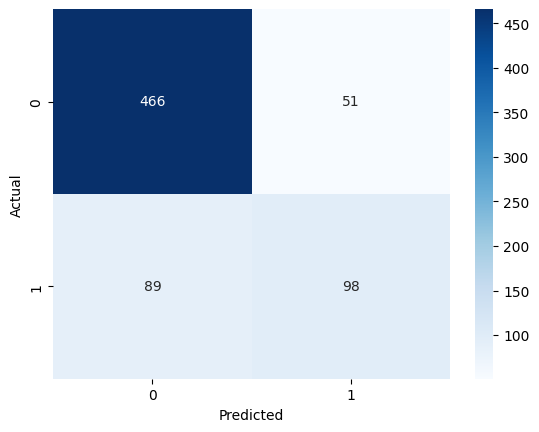

In [34]:
# Showing the confusion matrix
cm = confusion_matrix(Y_test, y_pred_prob)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [35]:
# Showing the classification report
report = classification_report(Y_test, y_pred_prob)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       517
           1       0.66      0.52      0.58       187

    accuracy                           0.80       704
   macro avg       0.75      0.71      0.73       704
weighted avg       0.79      0.80      0.79       704



# <center>__Model Deployment__</center>

In [36]:
best_model = create_model()

# Save using pickle
filename = 'best_model.joblib'
joblib.dump(best_model, filename)

['best_model.joblib']

In [37]:
# Saving the validation data
combined_val = pd.concat([pd.DataFrame(X_val), pd.DataFrame(Y_val)], axis=1)
values_df = pd.DataFrame(combined_val)

# Changing the dataframe to a csv file to load
values_df.to_csv('validation_data.csv',index = False)